In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import timeit
import h5py
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, MaxPooling2D ,Dropout, Flatten
import tensorflow.keras as keras
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"


In [5]:
f = h5py.File("D:\Work\EPE\PracticalIntroductionNN\HW2_template\cat_dog\dc_227.h5", "r")

In [6]:
Datasetnames=f.keys()

In [7]:
print(Datasetnames)

<KeysViewHDF5 ['test_img', 'test_lab', 'train_img', 'train_lab', 'val_img', 'val_lab']>


In [8]:
test_img = f["test_img"][...]
test_lab = f["test_lab"][...]

In [9]:
model = keras.models.load_model("D:\Work\EPE\PracticalIntroductionNN\HW2_template\cat_dog\\alex.h5")

In [10]:
def eval_generator(data, targets, batch_size):
     batches = (len(data) + batch_size - 1)//batch_size
     for i in range(batches):
          X = data[i*batch_size : (i+1)*batch_size]
          Y = targets[i*batch_size : (i+1)*batch_size]
          yield (X, Y)

In [17]:
result = model.predict(eval_generator(test_img, test_lab, 500))

In [21]:
results = [[i,r] for i,r in enumerate(result)]


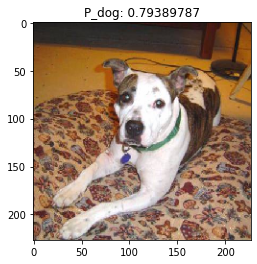

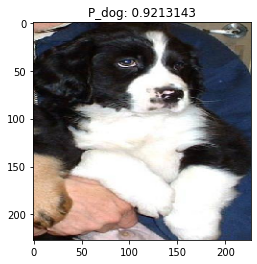

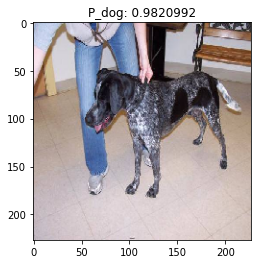

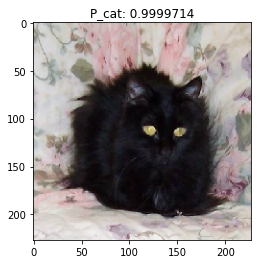

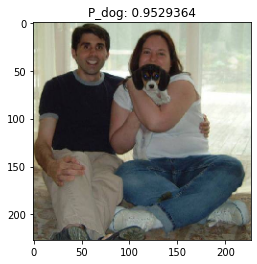

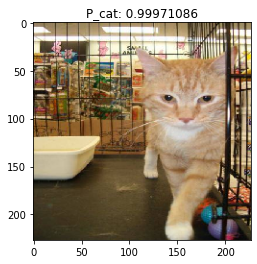

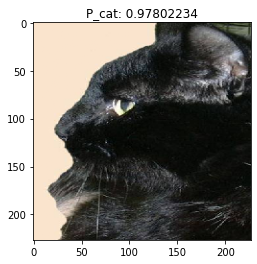

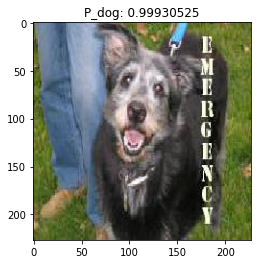

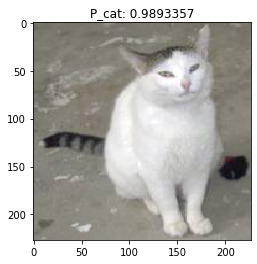

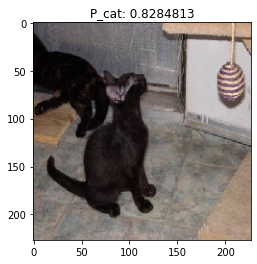

In [39]:
for i in range(10):
    index = np.random.randint(1,5000)
    pred = results[index]
    if pred[1][0]>=0.5:
        result = "P_dog: "+str(pred[1][0])
    else:
        result = "P_cat: "+str(pred[1][1])
    fig = plt.figure()
    plt.imshow(np.squeeze(test_img[index]))
    plt.title(result)

In [22]:
print(results)

[[0, array([0.9325719 , 0.06742814], dtype=float32)], [1, array([0.03392131, 0.9660787 ], dtype=float32)], [2, array([0.43438458, 0.5656154 ], dtype=float32)], [3, array([0.32149276, 0.67850727], dtype=float32)], [4, array([0.892337  , 0.10766292], dtype=float32)], [5, array([0.22295432, 0.77704567], dtype=float32)], [6, array([0.9271991 , 0.07280083], dtype=float32)], [7, array([4.4326176e-04, 9.9955672e-01], dtype=float32)], [8, array([0.09866636, 0.9013337 ], dtype=float32)], [9, array([0.82934064, 0.17065935], dtype=float32)], [10, array([0.95947385, 0.04052617], dtype=float32)], [11, array([0.1146882, 0.8853118], dtype=float32)], [12, array([0.7462334 , 0.25376663], dtype=float32)], [13, array([6.5998111e-06, 9.9999344e-01], dtype=float32)], [14, array([0.04809077, 0.95190924], dtype=float32)], [15, array([0.07286809, 0.9271319 ], dtype=float32)], [16, array([0.03670911, 0.9632909 ], dtype=float32)], [17, array([0.20006685, 0.7999332 ], dtype=float32)], [18, array([2.042986e-06, 9